# Data Collection

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("amazon_returns_dataset_cleaned.csv")

In [2]:
df.head()

,order_id,customer_id,product_id,product_category,price,quantity,order_datetime,order_weekday,order_hour,delivery_days,...,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,payment_method,discount_pct,review_rating,return_score,returned,return_reason
0,O101501,C12194,P21679,Toys,59.61,3,2024-10-14 01:00:00,Monday,1,2,...,4.02,0,309,5,Credit Card,0,4,0.2240,0,NaN
1,O102586,C11772,P21604,Beauty,381.33,1,2024-02-13 10:00:00,Tuesday,10,4,...,3.52,2,3286,9,Credit Card,0,4,0.4945,1,Damaged
2,O102653,C10069,P21075,Books,12.15,1,2024-02-01 19:00:00,Thursday,19,4,...,3.60,0,3075,10,NetBanking,20,3,0.2246,0,NaN
3,O101055,C10845,P20589,Beauty,55.64,1,2024-07-29 11:00:00,Monday,11,1,...,4.94,1,2008,7,Gift Card,0,5,0.2299,0,NaN
4,O100705,C12233,P21732,Books,25.74,1,2025-08-16 06:00:00,Saturday,6,2,...,4.02,0,1384,5,UPI,10,3,0.1903,0,NaN


In [3]:
df.shape

(5000, 22)

In [4]:
df.isnull().sum()

order_id                     0
customer_id                  0
product_id                   0
product_category             0
price                        0
quantity                     0
order_datetime               0
order_weekday                0
order_hour                   0
delivery_days                0
shipping_type                0
is_prime_member              0
seller_rating                0
previous_returns_count       0
customer_tenure_days         0
customer_total_orders        0
payment_method               0
discount_pct                 0
review_rating                0
return_score                 0
returned                     0
return_reason             2500
dtype: int64

In [5]:
df.dtypes

order_id                   object
customer_id                object
product_id                 object
product_category           object
price                     float64
quantity                    int64
order_datetime             object
order_weekday              object
order_hour                  int64
delivery_days               int64
shipping_type              object
is_prime_member             int64
seller_rating             float64
previous_returns_count      int64
customer_tenure_days        int64
customer_total_orders       int64
payment_method             object
discount_pct                int64
review_rating               int64
return_score              float64
returned                    int64
return_reason              object
dtype: object

In [6]:
df.nunique()

order_id                  5000
customer_id               2447
product_id                2842
product_category             7
price                     4526
quantity                     3
order_datetime            4235
order_weekday                7
order_hour                  24
delivery_days                7
shipping_type                4
is_prime_member              2
seller_rating              201
previous_returns_count       5
customer_tenure_days      2890
customer_total_orders       19
payment_method               6
discount_pct                 7
review_rating                5
return_score              3295
returned                     2
return_reason                9
dtype: int64

In [7]:
df.describe()

,price,quantity,order_hour,delivery_days,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,discount_pct,review_rating,return_score,returned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,145.728316,1.116600,11.296600,3.353200,0.450000,4.003252,0.611600,1998.899200,8.037600,6.891000,3.955600,0.381064,0.50000
std,182.738809,0.380833,6.844618,2.049412,0.497543,0.580645,0.779273,1162.445843,2.825276,8.353626,1.061816,0.152509,0.50005
min,3.440000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.00000
25%,46.017500,1.000000,5.000000,2.000000,0.000000,3.510000,0.000000,985.500000,6.000000,0.000000,4.000000,0.265725,0.00000
50%,89.605000,1.000000,11.000000,3.000000,0.000000,4.000000,0.000000,2007.000000,8.000000,5.000000,4.000000,0.360850,0.50000
75%,176.822500,1.000000,17.000000,4.000000,1.000000,4.510000,1.000000,3024.500000,10.000000,10.000000,5.000000,0.482025,1.00000
max,4459.530000,3.000000,23.000000,10.000000,1.000000,5.000000,4.000000,3999.000000,19.000000,30.000000,5.000000,1.000000,1.00000


# Univariate Analysis

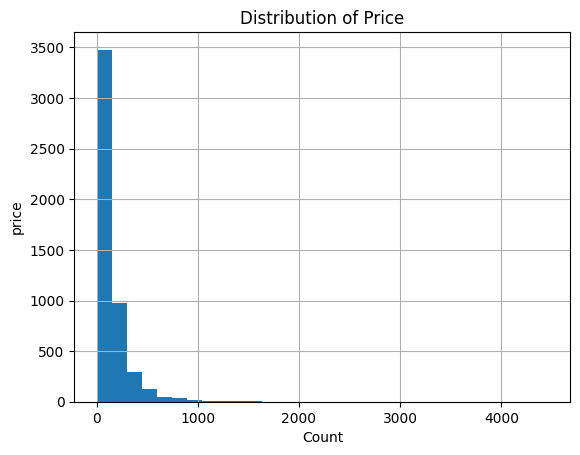

In [8]:
#Univariate Analysis 
#price plays a role in returned and not returned column
import matplotlib.pyplot as plt
df['price'].hist(bins=30)
plt.xlabel('Count')
plt.ylabel('price')
plt.title('Distribution of Price') 
plt.show()

<Axes: xlabel='returned', ylabel='count'>

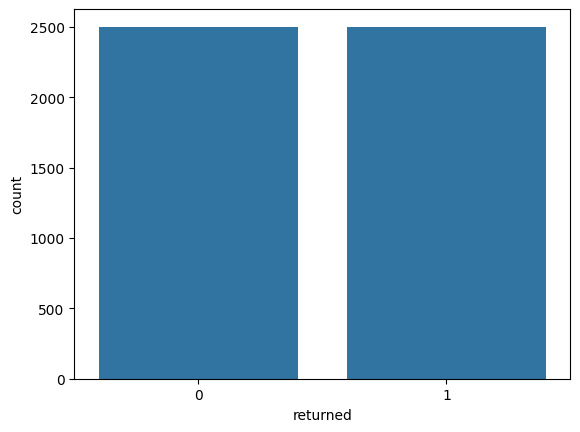

In [9]:
#Check target distribution:
import seaborn as sns
sns.countplot(x='returned', data=df)

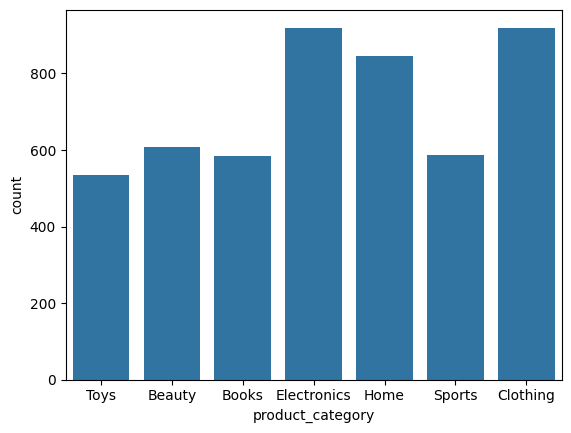

In [10]:
sns.countplot(x='product_category', data=df)
plt.show()

In [11]:
df['returned'].value_counts()

returned
0    2500
1    2500
Name: count, dtype: int64

# Bivariate Analysis

<Axes: xlabel='returned', ylabel='price'>

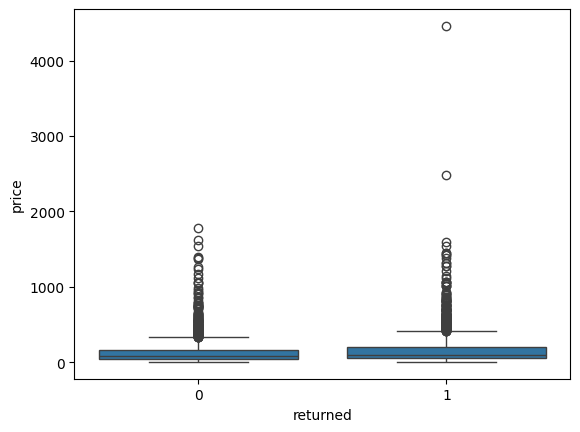

In [12]:
#Analyze relationship between price and returned
sns.boxplot(x='returned',y='price',data=df)

<Axes: xlabel='product_category', ylabel='count'>

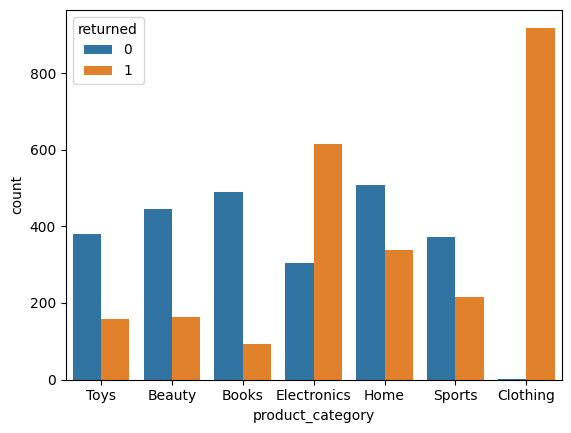

In [13]:
# Analyze relationship between product category and returned status
sns.countplot(x='product_category', hue='returned', data=df)

In [14]:
# Calculate return percentage within each shipping type
pd.crosstab(df['shipping_type'], df['returned'], normalize='index')* 100 

returned,0,1
shipping_type,,
Expedited,48.915663,51.084337
Same-Day,50.927835,49.072165
Standard,50.155348,49.844652
Two-Day,50.540806,49.459194


<Axes: xlabel='price', ylabel='returned'>

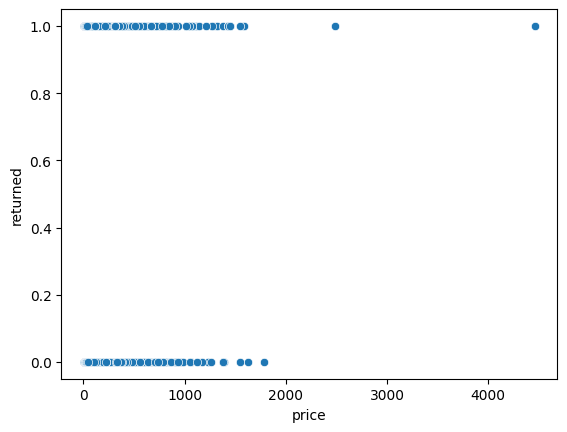

In [15]:
# Visualizing relationship between price and return status
sns.scatterplot(x='price', y='returned', data=df)

In [16]:
# Computing correlation matrix for all numeric features
corr = df.select_dtypes(include=['float64', 'int64']).corr()
corr
#correlation to quantify and compare how strongly two variables are related, regardless of their units.

,price,quantity,order_hour,delivery_days,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,discount_pct,review_rating,return_score,returned
price,1.000000,-0.012342,-0.001371,0.002006,0.013361,0.011761,-0.001214,0.007569,-0.026850,0.006960,-0.000166,0.130503,0.092553
quantity,-0.012342,1.000000,-0.018565,-0.001260,0.012299,0.013863,-0.003076,0.006052,-0.024341,-0.000154,0.026162,-0.003625,-0.003677
order_hour,-0.001371,-0.018565,1.000000,0.017757,-0.002018,-0.000781,-0.007651,-0.006133,-0.007321,-0.026097,0.003601,0.009852,0.009907
delivery_days,0.002006,-0.001260,0.017757,1.000000,0.003002,-0.033754,-0.004645,-0.014132,0.008692,-0.015301,0.010885,0.075867,0.071247
is_prime_member,0.013361,0.012299,-0.002018,0.003002,1.000000,0.001262,0.008203,0.030549,0.005465,-0.011298,-0.022757,-0.126329,-0.088443
seller_rating,0.011761,0.013863,-0.000781,-0.033754,0.001262,1.000000,-0.015069,0.038929,0.002073,0.009434,0.022836,-0.229304,-0.174327
previous_returns_count,-0.001214,-0.003076,-0.007651,-0.004645,0.008203,-0.015069,1.000000,0.005338,0.012722,-0.010838,0.007198,0.515573,0.415300
customer_tenure_days,0.007569,0.006052,-0.006133,-0.014132,0.030549,0.038929,0.005338,1.000000,0.014722,-0.001707,-0.010449,-0.005589,-0.006505
customer_total_orders,-0.026850,-0.024341,-0.007321,0.008692,0.005465,0.002073,0.012722,0.014722,1.000000,-0.003649,0.004357,-0.008623,-0.001133
discount_pct,0.006960,-0.000154,-0.026097,-0.015301,-0.011298,0.009434,-0.010838,-0.001707,-0.003649,1.000000,-0.011168,0.139948,0.122953


In [17]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
cov_matrix = numeric_df.cov()
cov_matrix
#covariance to understand whether two numeric variables tend to move in the same or opposite directions

,price,quantity,order_hour,delivery_days,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,discount_pct,review_rating,return_score,returned
price,33393.472133,-0.858939,-1.714743,0.751193,1.214769,1.247946,-0.172909,1.607802e+03,-13.862079,10.623909,-0.032227,3.637007,8.457397
quantity,-0.858939,0.145033,-0.048393,-0.000983,0.002330,0.003065,-0.000913,2.679089e+00,-0.026189,-0.000491,0.010579,-0.000211,-0.000700
order_hour,-1.714743,-0.048393,46.848798,0.249091,-0.006871,-0.003105,-0.040809,-4.879906e+01,-0.141580,-1.492169,0.026174,0.010285,0.033907
delivery_days,0.751193,-0.000983,0.249091,4.200090,0.003061,-0.040167,-0.007419,-3.366793e+01,0.050330,-0.261954,0.023687,0.023712,0.073015
is_prime_member,1.214769,0.002330,-0.006871,0.003061,0.247550,0.000365,0.003181,1.766849e+01,0.007682,-0.046959,-0.012022,-0.009586,-0.022004
seller_rating,1.247946,0.003065,-0.003105,-0.040167,0.000365,0.337148,-0.006818,2.627595e+01,0.003400,0.045760,0.014079,-0.020306,-0.050616
previous_returns_count,-0.172909,-0.000913,-0.040809,-0.007419,0.003181,-0.006818,0.607267,4.835416e+00,0.028009,-0.070550,0.005956,0.061274,0.161832
customer_tenure_days,1607.802207,2.679089,-48.799063,-33.667931,17.668494,26.275955,4.835416,1.351280e+06,48.349660,-16.572702,-12.897055,-0.990883,-3.780956
customer_total_orders,-13.862079,-0.026189,-0.141580,0.050330,0.007682,0.003400,0.028009,4.834966e+01,7.982183,-0.086119,0.013072,-0.003716,-0.001600
discount_pct,10.623909,-0.000491,-1.492169,-0.261954,-0.046959,0.045760,-0.070550,-1.657270e+01,-0.086119,69.783076,-0.099059,0.178294,0.513603


<Axes: xlabel='payment_method'>

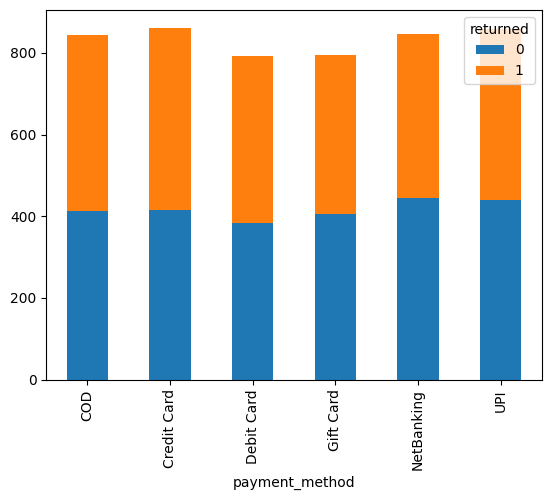

In [18]:
## Plotting stacked bar chart showing return counts for each payment method
pd.crosstab(df['payment_method'], df['returned']).plot(kind='bar', stacked=True)

# Outlier Detection

In [19]:
#Numerical and categorical separation
qualitative = df.select_dtypes(include='object').columns.tolist()
quantitative = df.select_dtypes(include='number').columns.tolist()

In [20]:
quantitative

['price',
 'quantity',
 'order_hour',
 'delivery_days',
 'is_prime_member',
 'seller_rating',
 'previous_returns_count',
 'customer_tenure_days',
 'customer_total_orders',
 'discount_pct',
 'review_rating',
 'return_score',
 'returned']

In [21]:
mean_values = df[quantitative].mean()
mean_values

price                      145.728316
quantity                     1.116600
order_hour                  11.296600
delivery_days                3.353200
is_prime_member              0.450000
seller_rating                4.003252
previous_returns_count       0.611600
customer_tenure_days      1998.899200
customer_total_orders        8.037600
discount_pct                 6.891000
review_rating                3.955600
return_score                 0.381064
returned                     0.500000
dtype: float64

In [22]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:Max","IQR","1.5:Rule","Greater",
                               "Lesser","Max","Min"],columns=quantitative) 
for columnName in quantitative: 
    descriptive.loc["Mean",columnName]=df[columnName].mean() 
    descriptive.loc["Median",columnName]=df[columnName].median() 
    descriptive.loc["Mode",columnName]=df[columnName].mode()[0]
    descriptive.loc["Q1:25%",columnName]=df.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%",columnName]=df.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%",columnName]=df.describe()[columnName]["75%"]
    descriptive.loc["Q4:Max",columnName]=df.describe()[columnName]["max"]
    descriptive.loc["IQR",columnName]=descriptive.loc["Q3:75%",columnName]-descriptive.loc["Q1:25%",columnName]
    descriptive.loc["1.5:Rule",columnName]=1.5*descriptive.loc["IQR",columnName]
    descriptive.loc["Greater",columnName]= descriptive.loc["Q3:75%",columnName]+descriptive.loc["1.5:Rule",columnName]
    descriptive.loc["Lesser",columnName]=descriptive.loc["Q1:25%",columnName]-descriptive.loc["1.5:Rule",columnName]
    descriptive.loc["Max",columnName]=df.describe()[columnName]["max"]
    descriptive.loc["Min",columnName]=df.describe()[columnName]["min"]

    
descriptive

,price,quantity,order_hour,delivery_days,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,discount_pct,review_rating,return_score,returned
Mean,145.728316,1.1166,11.2966,3.3532,0.45,4.003252,0.6116,1998.8992,8.0376,6.891,3.9556,0.381064,0.5
Median,89.605,1.0,11.0,3.0,0.0,4.0,0.0,2007.0,8.0,5.0,4.0,0.36085,0.5
Mode,129.53,1,12,3,0,3.62,0,2293,8,0,4,0.2713,0
Q1:25%,46.0175,1.0,5.0,2.0,0.0,3.51,0.0,985.5,6.0,0.0,4.0,0.265725,0.0
Q2:50%,89.605,1.0,11.0,3.0,0.0,4.0,0.0,2007.0,8.0,5.0,4.0,0.36085,0.5
Q3:75%,176.8225,1.0,17.0,4.0,1.0,4.51,1.0,3024.5,10.0,10.0,5.0,0.482025,1.0
Q4:Max,4459.53,3.0,23.0,10.0,1.0,5.0,4.0,3999.0,19.0,30.0,5.0,1.0,1.0
IQR,130.805,0.0,12.0,2.0,1.0,1.0,1.0,2039.0,4.0,10.0,1.0,0.2163,1.0
1.5:Rule,196.2075,0.0,18.0,3.0,1.5,1.5,1.5,3058.5,6.0,15.0,1.5,0.32445,1.5
Greater,373.03,1.0,35.0,7.0,2.5,6.01,2.5,6083.0,16.0,25.0,6.5,0.806475,2.5


In [23]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=['int64', 'float64']) 
z_scores = zscore(numeric_cols)
z_scores
#z-score to standardize data so that all features are on the same scale and to detect outliers.

array([[-0.47131165,  4.94597499, -1.50448564, ...,  0.04181932,
        -1.02997365, -1.        ],
       [ 1.28941   , -0.30620191, -0.18945245, ...,  0.04181932,
         0.74387478,  1.        ],
       [-0.73105257, -0.30620191,  1.12558075, ..., -0.90005725,
        -1.02603905, -1.        ],
       ...,
       [ 0.34824594, -0.30620191,  0.39500675, ...,  0.04181932,
         1.48948131,  1.        ],
       [-0.55843924,  2.31988654,  0.24889195, ..., -0.90005725,
        -1.19391528, -1.        ],
       [-0.58366903, -0.30620191, -0.18945245, ..., -0.90005725,
         1.25799573,  1.        ]], shape=(5000, 13))

In [24]:
outliers = (np.abs(z_scores) > 3)
outliers.sum()

np.int64(567)

# Statistical Tests

In [25]:
from scipy.stats import ttest_ind

# Example: Price vs Prime membership
prime_prices = df[df['is_prime_member']==1]['price']
nonprime_prices = df[df['is_prime_member']==0]['price']

t_stat, p_value = ttest_ind(prime_prices, nonprime_prices)
t_stat
#t-test tells whether the difference between two groups averages is due to chance or a real effect

np.float64(0.9446451095593066)

In [26]:
#t-test to compare the means of two groups and the p-value tells us whether the difference is statistically significant or just due to random chance
p_value

np.float64(0.34488575171432245)

In [27]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Separate groups based on 'returned' and drop missing values
returned_prices = df[df['returned'] == 1]['price'].dropna()
nonreturned_prices = df[df['returned'] == 0]['price'].dropna()

# Perform independent t-test
t_stat, p_value = ttest_ind(returned_prices, nonreturned_prices)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)
#Since, this condition p_vales<0.05 is false reject null 

t-statistic: 6.571413062614415
p-value: 5.491689183869967e-11


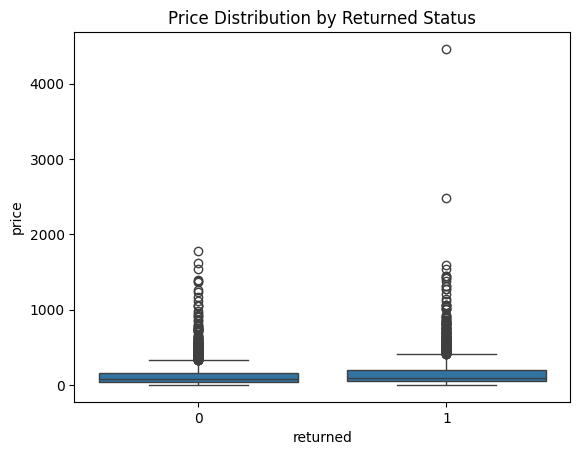

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='returned', y='price', data=df)
plt.title('Price Distribution by Returned Status')
plt.show()


The boxplot compares prices of returned vs non-returned items. We can see differences in median price, variation, and outliers, which helps us understand whether price influences returns.

# Data Preprocessing

In [29]:
# Finding outliers in Function
def finding_outliers():
    lesser=[]
    greater=[]
    for columnName in quantitative:
        if descriptive[columnName]["Lesser"]>descriptive[columnName]["Min"]:
            lesser.append(columnName)
        if descriptive[columnName]["Greater"]<descriptive[columnName]["Max"]:
            greater.append(columnName)
    return lesser,greater

In [30]:
lesser,greater = finding_outliers()

In [31]:
lesser

['review_rating']

In [32]:
greater

['price',
 'quantity',
 'delivery_days',
 'previous_returns_count',
 'customer_total_orders',
 'discount_pct',
 'return_score']

In [33]:
df = df.copy()

In [34]:
df.drop(["order_id","customer_id","product_id","order_datetime","review_rating","return_score","return_reason"],axis=1,inplace=True)

In [35]:
Week_order = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, 
              "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7}

# Clean the column by stripping spaces and mapping
df["order_weekday"] = df["order_weekday"].astype(str).str.strip().map(Week_order)

df.head()

,product_category,price,quantity,order_weekday,order_hour,delivery_days,shipping_type,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,customer_total_orders,payment_method,discount_pct,returned
0,Toys,59.61,3,1,1,2,Standard,0,4.02,0,309,5,Credit Card,0,0
1,Beauty,381.33,1,2,10,4,Standard,0,3.52,2,3286,9,Credit Card,0,1
2,Books,12.15,1,4,19,4,Same-Day,1,3.60,0,3075,10,NetBanking,20,0
3,Beauty,55.64,1,1,11,1,Expedited,0,4.94,1,2008,7,Gift Card,0,0
4,Books,25.74,1,6,6,2,Two-Day,1,4.02,0,1384,5,UPI,10,0


In [36]:
product = {'Toys' : 0, 'Beauty': 1, 'Books':2, 'Electronics':3, 'Home':4, 'Sports':5,
       'Clothing':6}
df["product_category"] = df["product_category"].map(product)

In [37]:
one_hot_cols = ["shipping_type", "payment_method"]
df_encoded = pd.get_dummies(df, columns=one_hot_cols,dtype=int,drop_first=False)
df_encoded.head()

,product_category,price,quantity,order_weekday,order_hour,delivery_days,is_prime_member,seller_rating,previous_returns_count,customer_tenure_days,...,shipping_type_Expedited,shipping_type_Same-Day,shipping_type_Standard,shipping_type_Two-Day,payment_method_COD,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gift Card,payment_method_NetBanking,payment_method_UPI
0,0,59.61,3,1,1,2,0,4.02,0,309,...,0,0,1,0,0,1,0,0,0,0
1,1,381.33,1,2,10,4,0,3.52,2,3286,...,0,0,1,0,0,1,0,0,0,0
2,2,12.15,1,4,19,4,1,3.60,0,3075,...,0,1,0,0,0,0,0,0,1,0
3,1,55.64,1,1,11,1,0,4.94,1,2008,...,1,0,0,0,0,0,0,1,0,0
4,2,25.74,1,6,6,2,1,4.02,0,1384,...,0,0,0,1,0,0,0,0,0,1


# Feature Selection

In [38]:
features = df_encoded[['product_category', 'price', 'quantity', 'order_weekday', 'order_hour',
       'delivery_days', 'is_prime_member', 'seller_rating','previous_returns_count', 'customer_tenure_days',
       'customer_total_orders', 'discount_pct', 'shipping_type_Same-Day', 'shipping_type_Standard',
       'shipping_type_Two-Day', 'payment_method_COD','payment_method_Credit Card', 'payment_method_Gift Card',
       'payment_method_NetBanking', 'payment_method_UPI']]
target = df_encoded['returned']
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

model = RandomForestClassifier(random_state=42)
model.fit(features, target)

importance = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance
#RandomForest automatically calculate feature importance,so they are very useful for selecting features in a simple and reliable way.

,Feature,Importance
0,product_category,0.300219
8,previous_returns_count,0.180953
7,seller_rating,0.092130
1,price,0.082283
9,customer_tenure_days,0.063797
4,order_hour,0.047019
10,customer_total_orders,0.041178
11,discount_pct,0.039433
5,delivery_days,0.038062
3,order_weekday,0.032164


In [39]:
selected_features = feature_importance[feature_importance['Importance'] > 0.04]['Feature'].tolist()
selected_features

['product_category',
 'previous_returns_count',
 'seller_rating',
 'price',
 'customer_tenure_days',
 'order_hour',
 'customer_total_orders']

In [40]:
features_reduced = df_encoded[selected_features]

In [41]:
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(features_reduced, target)

print("Original feature count:", features.shape[1])
print("Reduced feature count:", features_reduced.shape[1])

Original feature count: 20
Reduced feature count: 7


In [42]:
#Replacing the Outliers
Greater_Outliers = ['price',
 'quantity',
 'delivery_days',
 'previous_returns_count',
 'customer_total_orders',
 'discount_pct']
for columnName in Greater_Outliers:
    condition_2 = df[columnName] > descriptive[columnName]["Greater"]
    df.loc[condition_2,columnName] = descriptive[columnName]["Greater"]

C:\Users\Vasanth Ravi\AppData\Local\Temp\ipykernel_18632\1801249386.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[condition_2,columnName] = descriptive[columnName]["Greater"]


In [43]:
quantitative = [col for col in quantitative if col in df.columns]

# Recompute descriptive safely
descriptive = pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:Max","IQR",
                                   "1.5:Rule","Greater","Lesser","Max","Min"], columns=quantitative)

for columnName in quantitative: 
    descriptive.loc["Mean", columnName] = df[columnName].mean() 
    descriptive.loc["Median", columnName] = df[columnName].median() 
    descriptive.loc["Mode", columnName] = df[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = df[columnName].quantile(0.25)
    descriptive.loc["Q2:50%", columnName] = df[columnName].quantile(0.50)
    descriptive.loc["Q3:75%", columnName] = df[columnName].quantile(0.75)
    descriptive.loc["Q4:Max", columnName] = df[columnName].max()
    descriptive.loc["IQR", columnName] = descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5:Rule", columnName] = 1.5 * descriptive.loc["IQR", columnName]
    descriptive.loc["Greater", columnName] = descriptive.loc["Q3:75%", columnName] + descriptive.loc["1.5:Rule", columnName]
    descriptive.loc["Lesser", columnName] = descriptive.loc["Q1:25%", columnName] - descriptive.loc["1.5:Rule", columnName]
    descriptive.loc["Max", columnName] = df[columnName].max()
    descriptive.loc["Min", columnName] = df[columnName].min()


In [44]:
lesser=[]
greater=[]
for columnName in quantitative:
    if descriptive[columnName]["Lesser"]>descriptive[columnName]["Min"]:
        lesser.append(columnName)
    if descriptive[columnName]["Greater"]<descriptive[columnName]["Max"]:
        greater.append(columnName)
     

In [45]:
lesser

[]

In [46]:
greater

[]

# Feature And Target Selection

In [47]:
features = df_encoded[['product_category','previous_returns_count','seller_rating','price','customer_tenure_days',
 'order_hour','customer_total_orders']]
target = df_encoded['returned']

#  Train-Test Split & Scaling

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 1/3, random_state = 0)

In [49]:
df_encoded['returned'].value_counts()

returned
0    2500
1    2500
Name: count, dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

#  Model Training & Evaluation

In [51]:
#Full Code to Train & Compare All Models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
import lightgbm as lgb

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_preds),
        "Precision": precision_score(y_test, y_preds),
        "Recall": recall_score(y_test, y_preds),
        "F1 Score": f1_score(y_test, y_preds)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
results_df

[LightGBM] [Info] Number of positive: 1637, number of negative: 1696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 3333, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491149 -> initscore=-0.035407
[LightGBM] [Info] Start training from score -0.035407


C:\Users\Vasanth Ravi\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.855429,0.895674,0.815759,0.853851
9,LightGBM,0.838632,0.869403,0.809965,0.838632
1,Random Forest,0.840432,0.883184,0.797219,0.838002
4,AdaBoost,0.842831,0.900133,0.783314,0.837670
8,XGBoost,0.827235,0.859825,0.796060,0.826715
6,SVM,0.812837,0.863937,0.757822,0.807407
2,Decision Tree,0.794241,0.811005,0.785632,0.798117
0,Logistic Regression,0.785843,0.815461,0.757822,0.785586
5,KNN,0.783443,0.810644,0.758980,0.783962
7,Naive Bayes,0.764247,0.852853,0.658169,0.742969


#  Hyperparameter Tuning (GridSearchCV)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [100, 200],'learning_rate': [0.05, 0.1, 0.2],'max_depth': [3, 5, 7],'subsample': [0.8, 1.0]
}

gbc = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best F1 Score: 0.8563429149645378


In [53]:
#1. RandomizedSearchCV — Faster Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

param_dist = {
    'n_estimators': np.arange(50, 301, 50),      # 50, 100, 150, 200, 250, 300
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

gbc = GradientBoostingClassifier()

random_search = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=param_dist,
    n_iter=20,             
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters found:", random_search.best_params_)
print("Best F1 score:", random_search.best_score_)

best_model = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'subsample': 0.6, 'n_estimators': np.int64(250), 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.1}
Best F1 score: 0.8580096460828092


# Cross-Validation

In [54]:
#2. Cross-validation — Check Stability of Your Model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='f1')

print("Cross-validation F1 scores:", scores)
print("Mean F1 score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation F1 scores: [0.85932722 0.84310618 0.8436019  0.85308057 0.86956522]
Mean F1 score: 0.8537362159274545
Standard deviation: 0.009979464418868825


I first compared multiple models and found Gradient Boosting gave the best F1 score. I used GridSearchCV to find the optimal parameters exhaustively, then RandomizedSearchCV to efficiently explore a larger parameter space, especially for additional hyperparameters. Finally, I applied cross-validation to ensure the F1 score was consistent across different splits, confirming that the model generalizes well.

# Model Evaluation (Confusion Matrix & ROC-AUC)

In [55]:
from sklearn.metrics import confusion_matrix, roc_auc_score

y_pred = best_model.predict(X_test)

y_proba = best_model.predict_proba(X_test)[:, 1]  

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[703 101]
 [159 704]]
ROC-AUC Score: 0.9215


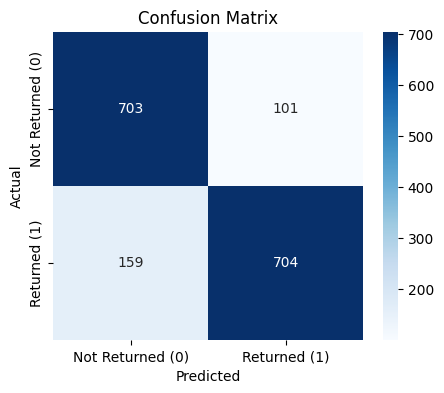

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       804
           1       0.87      0.82      0.84       863

    accuracy                           0.84      1667
   macro avg       0.85      0.85      0.84      1667
weighted avg       0.85      0.84      0.84      1667



In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Returned (0)", "Returned (1)"],
            yticklabels=["Not Returned (0)", "Returned (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


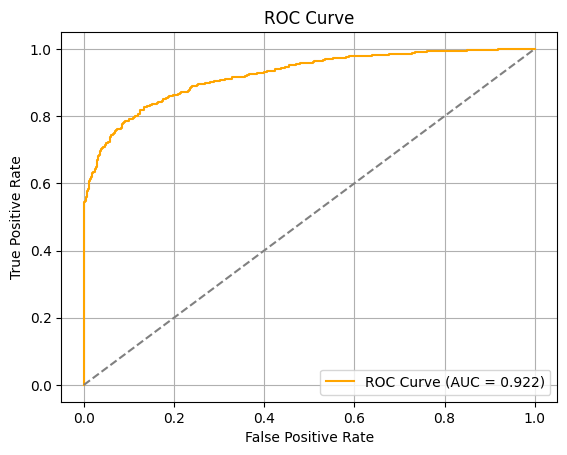

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = best_model.predict_proba(X_test)[:, 1]

# Compute False Positive Rate (FPR), True Positive Rate (TPR) for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='orange')
plt.plot([0, 1], [0, 1], '--', color='gray')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [58]:
# Deployment

In [59]:
import pickle
filename="Finalised_Model.sav"
pickle.dump(best_model,open(filename,'wb'))

In [60]:
load_model=pickle.load(open("Finalised_Model.sav",'rb'))

In [61]:
y_pred = load_model.predict(X_test)
y_proba = load_model.predict_proba(X_test)[:, 1]

# Prediction on New Data

In [62]:
new_data = pd.DataFrame([{'product_category': 1,
 'previous_returns_count': 2,
 'seller_rating':4.6,
 'price' : 164.53,
 'customer_tenure_days' : 500,
 'order_hour': 15,
 'customer_total_orders' : 10}])
# Predict returned or not
pred_class = load_model.predict(new_data.values)
pred_proba = load_model.predict_proba(new_data.values)[:, 1]

pred_class = load_model.predict(new_data)

# Predict probability of being returned
pred_proba = load_model.predict_proba(new_data)[:, 1]

print("Predicted Class:", pred_class)
print("Predicted Probability of Return:", pred_proba)


Predicted Class: [0]
Predicted Probability of Return: [0.19882985]


C:\Users\Vasanth Ravi\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\Vasanth Ravi\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Model expects preprocessed features (one-hot encoding, numeric scaling, etc.), but a user doesn’t know how to provide 0/1 for shipping type or payment method. The user knows just to give raw, understandable inputs like "Credit Card" or "Standard" and have your model handle the preprocessing automatically.

In [65]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Example DataFrame
# df = pd.read_csv("your_data.csv")

numeric_features = ['previous_returns_count','price','customer_tenure_days',
                    'customer_total_orders','order_hour','seller_rating']
categorical_features = ['product_category']

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline with preprocessor + model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier())
])

# Features and target
X = df[numeric_features + categorical_features]
y = df['returned']  # your target column

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a pickle file
with open("ReturnRiskModel_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("Pipeline saved successfully as ReturnRiskModel_pipeline.pkl")


Pipeline saved successfully as ReturnRiskModel_pipeline.pkl


In [66]:
import pickle
import pandas as pd

# Load the pipeline
with open("ReturnRiskModel_pipeline.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

# Prepare new input data
user_input_data = {
    'product_category': 'Toys',
    'previous_returns_count': 1,
    'price': 150.5,
    'customer_tenure_days': 500,
    'customer_total_orders': 10,
    'order_hour': 14,
    'seller_rating': 4.5,
}

user_input = pd.DataFrame([user_input_data])

# Make predictions
pred_class = loaded_pipeline.predict(user_input)
pred_proba = loaded_pipeline.predict_proba(user_input)[:, 1]

print("Predicted Class:", pred_class[0])         # 0 = Not Returned, 1 = Returned
print("Predicted Probability:", pred_proba[0])   # probability of return


Predicted Class: 0
Predicted Probability: 0.3634945929567881
